In [ ]:
!pip install pyspark py4j

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.4 MB 37 kB/s 
     |████████████████████████████████| 199 kB 20.0 MB/s 
     |████████████████████████████████| 198 kB 37.7 MB/s 
  Created wheel for pyspark: filename=pyspark-3.2.1-py2.py3-none-any.whl size=281853642 sha256=660c6bca840bb91802fb6870f2b8ca94cf1e609c2c84207d2f3ab94052e4a99e
  Stored in directory: /root/.cache/pip/wheels/9f/f5/07/7cd8017084dce4e93e84e92efd1e1d5334db05f2e83bcef74f
Successfully built pyspark


In [ ]:
from pyspark.sql import SparkSession

In [ ]:
spark = SparkSession = SparkSession.builder.appName("BDA_pyspark").getOrCreate()

In [ ]:
table1 = spark.read.option('inferSchema', 'true').csv('songs_normalize.csv', header = True)

In [ ]:
table1.createTempView("table1")

In [ ]:
countExplicitContent = spark.sql(''' 
SELECT year, COUNT(song) 
FROM table1
WHERE explicit = "TRUE" AND year BETWEEN 2000 AND 2019
GROUP BY year
ORDER BY year ASC
''')

result = countExplicitContent.toPandas()
print(result)

    year  count(song)
0   2000           12
1   2001           23
2   2002           30
3   2003           23
4   2004           36
5   2005           29
6   2006           26
7   2007           22
8   2008           23
9   2009           23
10  2010           23
11  2011           25
12  2012           19
13  2013           20
14  2014           20
15  2015           29
16  2016           32
17  2017           37
18  2018           51
19  2019           37


In [ ]:
avgDuration = spark.sql(''' 
SELECT year, AVG(duration_ms)
FROM table1
WHERE year BETWEEN 2000 AND 2019
GROUP BY year
ORDER BY year ASC
''')

result = avgDuration.toPandas()
print(result)

    year  avg(duration_ms)
0   2000     249993.067568
1   2001     242450.064815
2   2002     253549.077778
3   2003     236334.639175
4   2004     234039.843750
5   2005     236514.288462
6   2006     238148.400000
7   2007     231749.904255
8   2008     235675.247423
9   2009     236082.059524
10  2010     220804.738318
11  2011     228739.626263
12  2012     224045.017391
13  2013     230661.449438
14  2014     220578.000000
15  2015     218380.636364
16  2016     220020.242424
17  2017     212327.189189
18  2018     209554.794393
19  2019     196728.775281


In [ ]:
avgDanceability = spark.sql(''' 
SELECT year, AVG(danceability)
FROM table1
WHERE year BETWEEN 2000 AND 2019
GROUP BY year
ORDER BY year ASC
''')

result = avgDanceability.toPandas()
print(result)

    year  avg(danceability)
0   2000           0.689824
1   2001           0.674130
2   2002           0.675244
3   2003           0.664876
4   2004           0.696833
5   2005           0.672923
6   2006           0.660863
7   2007           0.630521
8   2008           0.664186
9   2009           0.625167
10  2010           0.661075
11  2011           0.634404
12  2012           0.637365
13  2013           0.632640
14  2014           0.661933
15  2015           0.651263
16  2016           0.670707
17  2017           0.693739
18  2018           0.725037
19  2019           0.719764


In [ ]:
avgEnergy = spark.sql(''' 
SELECT year, AVG(energy)
FROM table1
WHERE year BETWEEN 2000 AND 2019
GROUP BY year
ORDER BY year ASC
''')

result = avgEnergy.toPandas()
print(result)

    year  avg(energy)
0   2000     0.748257
1   2001     0.724631
2   2002     0.722567
3   2003     0.701485
4   2004     0.734698
5   2005     0.701048
6   2006     0.705347
7   2007     0.767149
8   2008     0.752320
9   2009     0.754702
10  2010     0.773804
11  2011     0.755596
12  2012     0.768983
13  2013     0.711842
14  2014     0.724365
15  2015     0.689596
16  2016     0.675980
17  2017     0.689351
18  2018     0.642196
19  2019     0.663921


In [ ]:
avgLoudness = spark.sql(''' 
SELECT year, AVG(loudness)
FROM table1
WHERE year BETWEEN 2000 AND 2019
GROUP BY year
ORDER BY year ASC
''')

result = avgLoudness.toPandas()
print(result)

    year  avg(loudness)
0   2000      -6.201378
1   2001      -5.879213
2   2002      -5.471333
3   2003      -5.797021
4   2004      -5.233708
5   2005      -5.928894
6   2006      -5.673337
7   2007      -4.994904
8   2008      -5.183258
9   2009      -4.979786
10  2010      -4.862458
11  2011      -5.163778
12  2012      -4.827043
13  2013      -5.802056
14  2014      -5.431413
15  2015      -5.648000
16  2016      -5.878212
17  2017      -5.561847
18  2018      -5.863206
19  2019      -5.869416


In [ ]:
topGenre = spark.sql(''' 
SELECT y.year,  table1.genre, COUNT(table1.genre) AS count, y.max
FROM (
  SELECT year, MAX(ct) AS max
  FROM (
    SELECT year, genre, COUNT(genre) AS ct
    FROM table1
    WHERE year BETWEEN 2000 AND 2019
    GROUP BY year, genre
  ) AS x
  GROUP BY year
  ORDER BY year
) AS y JOIN table1 ON table1.year = y.year
GROUP BY y.year, y.max, table1.genre
HAVING count = y.max
ORDER BY y.year

''')

result = topGenre.toPandas()
print(result)

    year                  genre  count  max
0   2000                    pop     16   16
1   2001                    pop     25   25
2   2002      hip hop, pop, R&B     27   27
3   2003           hip hop, pop     18   18
4   2004                    pop     15   15
5   2004               pop, R&B     15   15
6   2005           hip hop, pop     21   21
7   2006                    pop     26   26
8   2007      hip hop, pop, R&B     19   19
9   2008                    pop     22   22
10  2009                    pop     20   20
11  2010           hip hop, pop     23   23
12  2011           hip hop, pop     18   18
13  2012                    pop     34   34
14  2013                    pop     27   27
15  2014                    pop     33   33
16  2015                    pop     25   25
17  2016  pop, Dance/Electronic     23   23
18  2017                    pop     28   28
19  2018                hip hop     18   18
20  2018           hip hop, pop     18   18
21  2019                    pop 

In [ ]:
genrePercentage = spark.sql(''' 
SELECT genre, COUNT(genre)/x.total*100 AS percentage
    FROM (
      SELECT COUNT(genre) AS total
      FROM table1
      ) AS x, table1
    WHERE year BETWEEN 2000 AND 2019
    GROUP BY genre, x.total
''')

result = genrePercentage.toPandas()
print(result)

                                    genre  percentage
0              World/Traditional, hip hop        0.05
1                                   latin        0.75
2             pop, rock, Dance/Electronic        0.65
3                              pop, latin        1.30
4                            pop, country        0.35
5                pop, rock, Folk/Acoustic        0.10
6                   hip hop, pop, country        0.05
7                      pop, Folk/Acoustic        0.40
8                  rock, Dance/Electronic        0.05
9                                   set()        1.05
10                              pop, rock        1.30
11                           hip hop, R&B        0.15
12            rock, pop, Dance/Electronic        0.40
13                       Dance/Electronic        2.00
14       World/Traditional, Folk/Acoustic        0.05
15                              rock, pop        2.05
16                                   rock        2.85
17                   rock, e

In [ ]:
artistMostTopHits = spark.sql(''' 

  SELECT artist, COUNT(artist) AS most
  FROM table1
  WHERE year BETWEEN 2000 AND 2019
  GROUP BY artist

''')

result = artistMostTopHits.toPandas()
print(result)

          artist  most
0         *NSYNC     4
1     Snoop Dogg     7
2         Grimes     1
3      Lil Nas X     3
4        Lucenzo     1
..           ...   ...
814  Bob Sinclar     2
815    Shinedown     1
816         Mann     1
817   AWOLNATION     1
818    Meek Mill     2

[819 rows x 2 columns]


In [ ]:
!pip install lightning-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 522 kB 9.0 MB/s 
  Created wheel for lightning-python: filename=lightning_python-1.2.1-py3-none-any.whl size=527644 sha256=9ad01b230b04c5907a2672ae35bc65fca1d60ee51d34ab04d6b58014b3932f3b
  Stored in directory: /root/.cache/pip/wheels/98/11/26/01cad267fe7c9d32fa21e4d4d534d08f56fc5d6afd3fe3cfdf
Successfully built lightning-python


In [ ]:
!pip install pygal cairosvg lxml tinycss cssselect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 129 kB 9.1 MB/s 
     |████████████████████████████████| 45 kB 4.2 MB/s 
     |████████████████████████████████| 87 kB 7.7 MB/s 
     |████████████████████████████████| 88 kB 9.2 MB/s 
  Created wheel for tinycss: filename=tinycss-0.4-py3-none-any.whl size=43955 sha256=c275a5f1bf8f013596d7521c789c135c53e523210a48b94eaa9f9a58709dcb55
  Stored in directory: /root/.cache/pip/wheels/6c/66/e8/e53d7a476011891fa51a5ee83a2d1852b19b258f975055429b
  Created wheel for cairocffi: filename=cairocffi-1.3.0-py3-none-any.whl size=89668 sha256=45f438b792456a27933ea93afe2f7973e2696a4b6646cdd88251e89838b08bcd
  Stored in directory: /root/.cache/pip/wheels/4e/ca/e1/5c8a9692a27f639a07c949044bec943f26c81cd53d3805319f
Successfully built tinycss cairocffi


In [ ]:
!apt-get install python-scipy python-pandas
!pip install seaborn

Reading package lists... Done
Building dependency tree       
Reading state information... Done
python-scipy is already the newest version (0.19.1-2ubuntu1).
python-pandas is already the newest version (0.22.0-4ubuntu1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from lightning import Lightning
from numpy import random


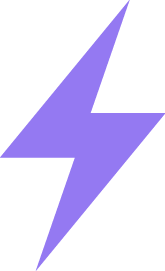

Running local mode, some functionality limited.



In [ ]:
lgn = Lightning(ipython=True, local=True)
x = range(2000, 2020)
y = [12, 23, 30, 23, 36, 29, 26, 22, 23, 23, 23, 25, 19, 20, 20, 29, 32, 37, 51, 37]
lgn.line(y, thickness = 6, index = x, xaxis = "Year", yaxis = "Explicit Content Count")


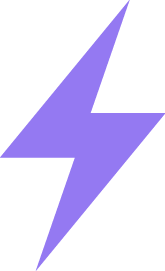

Running local mode, some functionality limited.



In [ ]:
lgn = Lightning(ipython=True, local=True)
x = range(2000, 2020)
y = [249993.067568, 242450.064815, 253549.077778, 236334.639175, 234039.843750, 236514.288462, 238148.400000, 231749.904255, 235675.247423, 236082.059524, 220804.738318, 228739.626263, 224045.017391, 230661.449438, 220578.000000, 218380.636364, 220020.242424, 212327.189189, 209554.794393, 196728.775281]
lgn.line(y, thickness = 6, index = x, xaxis = "Year", yaxis = "Average Duration (ms)")


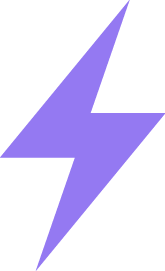

Running local mode, some functionality limited.



In [ ]:
lgn = Lightning(ipython=True, local=True)
x = range(2000, 2020)
y = [0.689824, 0.674130, 0.675244, 0.664876, 0.696833, 0.672923, 0.660863, 0.630521, 0.664186, 0.625167, 0.661075, 0.634404, 0.637365, 0.632640, 0.661933, 0.651263, 0.670707, 0.693739, 0.725037, 0.719764]
lgn.line(y, thickness = 6, index = x, xaxis = "Year", yaxis = "Average Danceability")


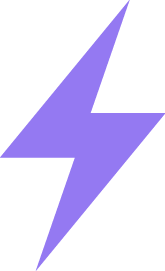

Running local mode, some functionality limited.



In [ ]:
lgn = Lightning(ipython=True, local=True)
x = range(2000, 2020)
y = [0.748257, 0.724631, 0.722567, 0.701485, 0.734698, 0.701048, 0.705347, 0.767149, 0.752320, 0.754702, 0.773804, 0.755596, 0.768983, 0.711842, 0.724365, 0.689596, 0.675980, 0.689351, 0.642196, 0.663921]
lgn.line(y, thickness = 6, index = x, xaxis = "Year", yaxis = "Average Energy")

In [ ]:
countExplicitContent = spark.sql(''' 
SELECT COUNT(song) 
FROM table1
WHERE explicit = "TRUE" AND year BETWEEN 2000 AND 2019
''')

result = countExplicitContent.toPandas()
print(result)

   count(song)
0          540


In [ ]:
countExplicitContent = spark.sql(''' 
SELECT COUNT(song) 
FROM table1
WHERE explicit = "FALSE" AND year BETWEEN 2000 AND 2019
''')

result = countExplicitContent.toPandas()
print(result)

   count(song)
0         1418


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #visualization
import seaborn as sns #visualization

In [ ]:
test = pd.read_csv("songs_normalize.csv")

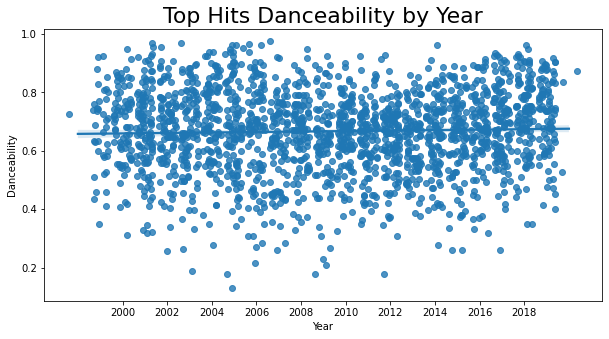

In [ ]:
plt.rcParams["figure.figsize"] = (10,5)
ax = sns.regplot(x="year", y="danceability", data=test, x_jitter=.4)
ax.set_title("Top Hits Danceability by Year", fontsize = 22)
ax.set_ylabel("Danceability")
ax.set_xlabel("Year")
ax.set_xticks(np.arange(2000, 2020, 2))